# **Linear Regression (Pt. 2)**

This Jupyter Notebook delves into the practical application and optimization of linear regression models using gradient descent. It begins with basic prediction and loss calculation, then explores the following: dataset generation, gradient descent optimization, and the effects of various hyperparameters.

***

## **1. Linear Model Predictions**

Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$

As we know, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$

If we suppose that $\vec{\hat{\beta}}=[1,2,1]$ and we receive an observation $x = [4, 2, 1]$, what $\hat{y}$ value will this model predict for the given observation?

In [1]:
import numpy as np

# Coefficients of the linear model
beta_hat = np.array([1, 2, 1])

# Given observation
x = np.array([4, 2, 1])

# Compute the predicted value y_hat
y_hat = np.dot(beta_hat, x)
print("Predicted Value:", y_hat)

Predicted Value: 9


### *1.1 ~ Calculation of L2 Loss*

If we suppose the correct $y$ was 6.1, what will be the L2 loss for our prediction $\hat{y}$ from Task 1?

In [2]:
y_true = 6.1
l2_loss = (y_hat - y_true)**2
print("L2 Loss:", l2_loss)

L2 Loss: 8.410000000000002


***

## **2. Dataset and Model Optimization**

The following function generates the dataset we need.

In [3]:
import numpy as np
import pandas as pd
# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [4]:
# Example:
data = generate_dataset(gamma=10)
data

,X,Y
0,0.193654,-0.376522
1,0.396498,2.512828
2,0.917656,7.745408
3,0.848115,7.379887
4,0.934873,5.682665
...,...,...
95,0.621476,2.770084
96,0.348553,2.720889
97,0.976036,8.405391
98,0.302778,0.835011


### *2.1 ~ Optimizing Gradient Descent*

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), we find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$.

In [5]:
x=data['X']
y_obs=data['Y']

def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)

def mse_loss_derivative(gamma):
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [6]:
n = 100
initial_guess = 0.1
alpha = 0.01

values = gradient_descent(mse_loss_derivative, initial_guess, alpha, n)
best_gamma = values[-1]
print("Best Gamma Value:", best_gamma)

Best Gamma Value: 3.6988636231581933


### *2.2 ~ Visualization of Model Fit*

We create a plot below showing the fitted simple linear regression model on the observed data for when we picked the gamma selected by the above algorithm. Our plot should include at least the following:

- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

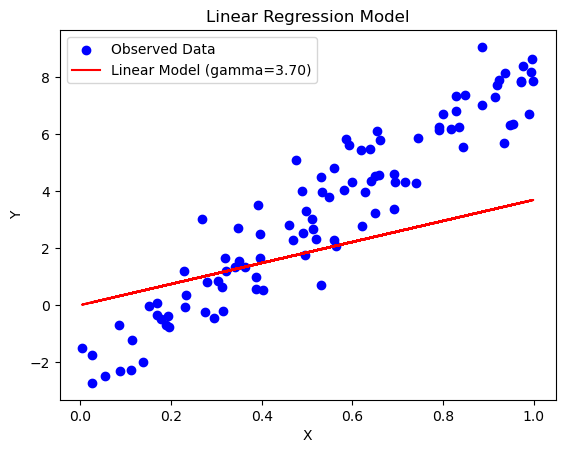

In [7]:
import matplotlib.pyplot as plt

y_pred = x * best_gamma
plt.scatter(x, y_obs, color='blue', label='Observed Data')
plt.plot(x, y_pred, color='red', label='Linear Model (gamma={:.2f})'.format(best_gamma))

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### *2.3 ~ Adjustment of Learning Rate*

We use a different value of $\alpha=0.1$ and repeat Tasks 2.1 and 2.2

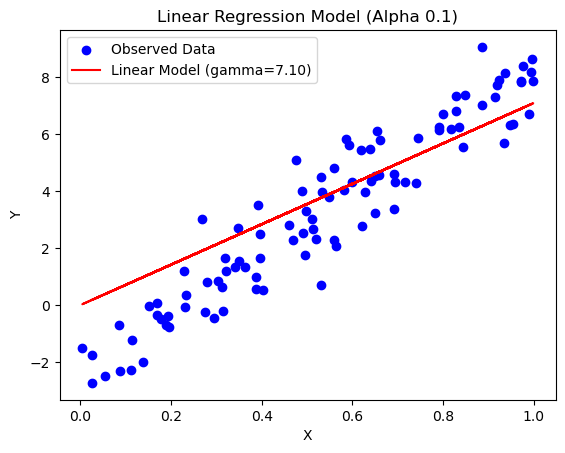

New Best Gamma Value: 7.103977446722171


In [8]:
new_alpha = 0.1
new_values = gradient_descent(mse_loss_derivative, initial_guess, new_alpha, n)
new_best_gamma = new_values[-1]

new_y_pred = x * new_best_gamma
plt.scatter(x, y_obs, color='blue', label='Observed Data')
plt.plot(x, new_y_pred, color='red', label='Linear Model (gamma={:.2f})'.format(new_best_gamma))

plt.title('Linear Regression Model (Alpha 0.1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("New Best Gamma Value:", new_best_gamma)

### *2.4 ~ Evaluation of Model Fit*

A lower MSE value of $\alpha$ results in a better model and indicates a better fit to the data. Therefore, Model 2 is the better model.

This is because the higher learning rate allowed our model to converge faster to an optimal gamma value.

In [9]:
mse_model1 = mse_loss(best_gamma)
mse_model2 = mse_loss(new_best_gamma)
print("MSE for Model #1:", mse_model1)
print("MSE for Model #2:", mse_model2)

MSE for Model #1: 6.263642109422976
MSE for Model #2: 2.049201617080037


### *2.5 ~ Exploring Further Improvements*

Some changes we can make in order to improve our model:
- **Initial Guess**: Can lead to faster convergence.
- **Number of Iterations**: Gives model more time for convergence.
- **Learning Rate**: Can significantly impact the performance of the model.
- **Regularization**: Can prevent overfitting.
- B**atch Size for Gradient**: Using mini-batch or stochastic can lead to faster convergence.

***

## **3. Comparative Model Analysis**

### *3.1 ~ Implementation of Prediction Function*

We write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for our model based on whether or not an intercept term is specified within the model itself. This is done using the sklearn.linear_model.LinearRegression library.

In [10]:
from sklearn.linear_model import LinearRegression

def calculate_y_hat(X, Y, with_intercept):
    if X.ndim == 1:
        X = np.array(X).reshape(-1, 1)
    if Y.ndim == 1:
        Y = np.array(Y).reshape(-1, 1)
    model_y_hat = LinearRegression(fit_intercept=with_intercept)
    model_y_hat.fit(X, Y)
    y_hat1 = model_y_hat.predict(X)
    return y_hat1

### *3.2 ~ Visual Comparison of Models with and without Intercepts*

We reate a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. The plot includes:

- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

We utilize different colors for the two line plots.

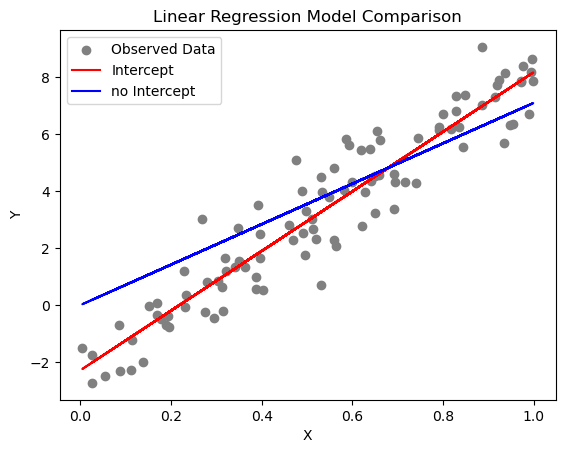

In [11]:
y_hat_with_intercept = calculate_y_hat(x, y_obs, True)
y_hat_without_intercept = calculate_y_hat(x, y_obs, False)

plt.scatter(x, y_obs, color='gray', label='Observed Data')
plt.plot(x, y_hat_with_intercept, color='red', label='Intercept')
plt.plot(x, y_hat_without_intercept, color='blue', label='no Intercept')

plt.title('Linear Regression Model Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()